In [9]:
import numpy as np
from utils import *

In [13]:
X_train, X_val, y_val = load_data()

In [14]:
def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape
    
    ### START CODE HERE ### 
    mu = np.mean(X, axis = 0)
    var = np.mean((X - mu) ** 2, axis = 0)
    
    ### END CODE HERE ### 
        
    return mu, var

In [ ]:
def visualize_fit(X, mu, var):
    """
    This visualization shows you the 
    probability density function of the Gaussian distribution. Each example
    has a location (x1, x2) that depends on its feature values.
    """

    '''
    You have a dataset X with two features (e.g., Latency and Throughput).
    You already estimated its Gaussian parameters: mean (mu) and variance (var).
    This function plots:
        1) The data points.
        2) Contour lines showing regions of equal probability density (like a topographic map for probability).
    '''
    
    X1, X2 = np.meshgrid(np.arange(0, 35.5, 0.5), np.arange(0, 35.5, 0.5))
    # np.meshgrid makes a 2D grid covering the range 0 to 35 (in steps of 0.5) for both axes.
    # Think of this as creating a map of coordinates where you want to evaluate your Gaussian function.
    # X1 and X2 are 2D arrays representing all possible (x₁, x₂) positions.
    Z = multivariate_gaussian(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, var)
    '''
    Step 1 — What we have
    From the earlier step:
        X1, X2 = np.meshgrid(np.arange(0, 35.5, 0.5),
                            np.arange(0, 35.5, 0.5))
    X1 and X2 are 2D arrays of the same shape.
    Example with a tiny mesh:
        X1 =
        [[0, 1, 2],
        [0, 1, 2]]

        X2 =
        [[10, 10, 10],
        [11, 11, 11]]
    Each (X1[i,j], X2[i,j]) is one coordinate.

    Step 2 — Flattening
        X1.ravel()
    Turns X1 into a 1D array: [0, 1, 2, 0, 1, 2]
        X2.ravel()
    Also a 1D array: 10, 10, 10, 11, 11, 11]
    Step 3 — Stacking
        np.stack([X1.ravel(), X2.ravel()], axis=1)
    np.stack([...], axis=1) puts them side by side as columns.

    Result:
        [[ 0, 10],
        [ 1, 10],
        [ 2, 10],
        [ 0, 11],
        [ 1, 11],
        [ 2, 11]]
    ✅ Meaning:
    We now have an (N, 2) array where each row is a coordinate (x₁, x₂) in the grid.
    This is exactly the format we need to pass into multivariate_gaussian so it can compute p(x) for every point in the grid.
    multivariate_gaussian takes these points and computes p(x) (probability density) using your mu and var.
    '''
    Z = Z.reshape(X1.shape) #X1.shape: (71, 71)

    plt.plot(X[:, 0], X[:, 1], 'bx') #'bx' → blue x markers for each data point.

    if np.sum(np.isinf(Z)) == 0:
        plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)
    '''
    a) np.isinf(Z): Returns a boolean array of the same shape as Z.
    Each entry is:
        True if that value in Z is infinite (inf or -inf)
        False otherwise.
    Example:
        Z = [0.1, np.inf, 0.3]
        np.isinf(Z) → [False, True, False]
    b) np.sum(np.isinf(Z)) == 0
    np.sum() here counts how many True values there are (since True is treated as 1, False as 0).
    If the sum is 0, it means there are no infinite values in Z.
    This acts as a safety check to avoid plotting invalid data.

    c) plt.contour(...)
    If the data is valid:
        plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)
    X1, X2: meshgrid coordinates (the x–y positions on the plot).
    Z: probability values for each coordinate.
    levels=10**(np.arange(-20., 1, 3)):
    np.arange(-20., 1, 3) → [-20, -17, -14, …, -2, 1]
    10**(...) turns those into probability contour levels: [1e-20, 1e-17, ..., 1e-2, 1e1]

    This way, contours are drawn at logarithmically spaced probability values.

    linewidths=1: makes contour lines thin.

    ✅ Summary in plain English
    This code says:

    “If there are no infinite probability values in Z, plot contour lines showing where the Gaussian PDF has certain probability levels, spaced on a log scale from 
    10^(−20) up to 10^(1).”
    '''
    # Set the title
    plt.title("The Gaussian contours of the distribution fit to the dataset")
    # Set the y-axis label
    plt.ylabel('Throughput (mb/s)')
    # Set the x-axis label
    plt.xlabel('Latency (ms)')

In [15]:
# Estimate mean and variance of each feature
mu, var = estimate_gaussian(X_train)   

In [2]:
X1, X2 = np.meshgrid(np.arange(0, 35.5, 2), np.arange(0, 35.5, 2))
print(X1.shape) #(71, 71)
print(X2.shape) 

(18, 18)
(18, 18)


In [20]:
X1[:2].ravel()

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.,
       16., 18., 20., 22., 24., 26., 28., 30., 32., 34.])

In [3]:
X2[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.]])

In [5]:
X2[:2].ravel()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2.])

In [21]:
v = X2[:2].ravel()
v.shape

(36,)

In [6]:
s = X2.ravel()
s.shape

(324,)

In [24]:
np.stack([X1[:2].ravel(), X2[:2].ravel()], axis=1) #(36, 2)

array([[ 0.,  0.],
       [ 2.,  0.],
       [ 4.,  0.],
       [ 6.,  0.],
       [ 8.,  0.],
       [10.,  0.],
       [12.,  0.],
       [14.,  0.],
       [16.,  0.],
       [18.,  0.],
       [20.,  0.],
       [22.,  0.],
       [24.,  0.],
       [26.,  0.],
       [28.,  0.],
       [30.,  0.],
       [32.,  0.],
       [34.,  0.],
       [ 0.,  2.],
       [ 2.,  2.],
       [ 4.,  2.],
       [ 6.,  2.],
       [ 8.,  2.],
       [10.,  2.],
       [12.,  2.],
       [14.,  2.],
       [16.,  2.],
       [18.,  2.],
       [20.,  2.],
       [22.,  2.],
       [24.,  2.],
       [26.,  2.],
       [28.,  2.],
       [30.,  2.],
       [32.,  2.],
       [34.,  2.]])

In [26]:
Z = multivariate_gaussian(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, var)
Z
# Z.shape #(324,)

array([6.14537868e-54, 1.00735665e-47, 1.86167277e-42, 3.87890294e-38,
       9.11171149e-35, 2.41310648e-32, 7.20507477e-31, 2.42541454e-30,
       9.20489720e-31, 3.93855928e-32, 1.89994623e-34, 1.03331019e-37,
       6.33586035e-42, 4.37991779e-47, 3.41359348e-53, 2.99946032e-60,
       2.97139181e-68, 3.31865573e-77, 7.93778703e-47, 1.30117003e-40,
       2.40466255e-35, 5.01025357e-31, 1.17693033e-27, 3.11693166e-25,
       9.30656223e-24, 3.13282958e-23, 1.18896682e-23, 5.08730974e-25,
       2.45409914e-27, 1.33469338e-30, 8.18382606e-35, 5.65739826e-40,
       4.40922838e-46, 3.87430596e-53, 3.83805077e-61, 4.28660036e-70,
       9.88110223e-41, 1.61972021e-34, 2.99336784e-29, 6.23685513e-25,
       1.46506436e-21, 3.88001344e-19, 1.15849786e-17, 3.89980346e-17,
       1.48004761e-17, 6.33277605e-19, 3.05490742e-21, 1.66145069e-24,
       1.01873761e-28, 7.04243264e-34, 5.48868799e-40, 4.82280680e-47,
       4.77767568e-55, 5.33603839e-64, 1.18540430e-35, 1.94312664e-29,
      

In [17]:
Z = Z.reshape(X1.shape)
Z

array([[6.14537868e-54, 1.00735665e-47, 1.86167277e-42, 3.87890294e-38,
        9.11171149e-35, 2.41310648e-32, 7.20507477e-31, 2.42541454e-30,
        9.20489720e-31, 3.93855928e-32, 1.89994623e-34, 1.03331019e-37,
        6.33586035e-42, 4.37991779e-47, 3.41359348e-53, 2.99946032e-60,
        2.97139181e-68, 3.31865573e-77],
       [7.93778703e-47, 1.30117003e-40, 2.40466255e-35, 5.01025357e-31,
        1.17693033e-27, 3.11693166e-25, 9.30656223e-24, 3.13282958e-23,
        1.18896682e-23, 5.08730974e-25, 2.45409914e-27, 1.33469338e-30,
        8.18382606e-35, 5.65739826e-40, 4.40922838e-46, 3.87430596e-53,
        3.83805077e-61, 4.28660036e-70],
       [9.88110223e-41, 1.61972021e-34, 2.99336784e-29, 6.23685513e-25,
        1.46506436e-21, 3.88001344e-19, 1.15849786e-17, 3.89980346e-17,
        1.48004761e-17, 6.33277605e-19, 3.05490742e-21, 1.66145069e-24,
        1.01873761e-28, 7.04243264e-34, 5.48868799e-40, 4.82280680e-47,
        4.77767568e-55, 5.33603839e-64],
       [1.185

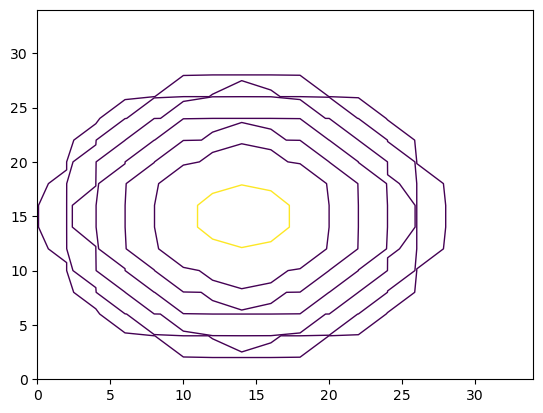

In [ ]:
plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)
'''
levels is now a list of probability density values.
For each level (say 1e-8), plt.contour looks through Z (the probability density from multivariate_gaussian(...)) and finds where it’s exactly equal to that level — or more precisely, interpolates between grid points where it crosses that level.
It then draws a smooth closed curve (often an ellipse in a Gaussian case) through those positions in (X1, X2) space.
So each oval you see corresponds to "all (x1, x2) pairs where p(x1, x2) = that specific level".
It’s like drawing “probability height” lines on a 2D map of your Gaussian.
'''